In [1]:
import globus_sdk
# Use native app credentials if you have a client ID
CLIENT_ID = "04dc20ba-d8e4-4a9a-9cc9-3ed3f3d49447"

# Create a UserApp instance
app = globus_sdk.UserApp(
    app_name="Notebook Main App",
    client_id=CLIENT_ID)

search_client = globus_sdk.SearchClient(app=app)
transfer_client = globus_sdk.TransferClient(app=app)

# Login if needed
app.login()


Please authenticate with Globus here:
-------------------------------------
https://auth.globus.org/v2/oauth2/authorize?client_id=04dc20ba-d8e4-4a9a-9cc9-3ed3f3d49447&redirect_uri=https%3A%2F%2Fauth.globus.org%2Fv2%2Fweb%2Fauth-code&scope=urn%3Aglobus%3Aauth%3Ascope%3Atransfer.api.globus.org%3Aall+openid+urn%3Aglobus%3Aauth%3Ascope%3Asearch.api.globus.org%3Asearch&state=_default&response_type=code&code_challenge=l2TfcIjYRaIabTYeCzlg-UI-PUUoA6XFK9R7VBv3HHE&code_challenge_method=S256&access_type=online&prefill_named_grant=Notebook+Main+App+on+x3006c0s13b1n0
-------------------------------------



Enter the resulting Authorization Code here:  NkZ35WkAQ9TAV6xmlqVOVb87yhsvVr


In [2]:
# INDEX_ID = "6871e83e-866b-41bc-8430-e3cf83b43bdc"
INDEX_ID = "4428cfe6-611b-48db-81b2-167a7d9710ea"

In [3]:
## This is the wrong query, just for testing
QUERY = "bacon"  # Match all entries (or a specific keyword)

response = search_client.post_search(
    index_id=INDEX_ID,
    data={"q": QUERY, "limit": 10}
)
print(response)

{
  "total": 0,
  "gmeta": [],
  "@datatype": "GSearchResult",
  "@version": "2017-09-01",
  "offset": 0,
  "count": 0,
  "has_next_page": false
}


In [4]:
## This is the wrong query, just for testing
QUERY = "milliron"  # Match all entries (or a specific keyword)

response = search_client.post_search(
    index_id=INDEX_ID,
    data={"q": QUERY, "limit": 10}
)

print(response['total'])
# huge print.. uncomment if necessary
#print(response)

21972


In [5]:
from gladier_xpcs.nb_utils.metadata import extract_metadata_structure

extract_metadata_structure(response)



DC KEYS
{'version', 'titles', 'dates', 'resourceType', 'identifier', 'types', 'date', 'publisher', 'title', 'identifiers', 'identifierType', 'publicationYear', 'name', 'schemaVersion', 'creators', 'subjects', 'formats', 'dateType', 'resourceTypeGeneral'}
PROJECT METADATA KEYS
{'rheometer_temperature', 'extent', 'incident_beam', '/xpcs/multitau/config', 'transmitted_beam_intensity', 'beam_center_position_y', 'detector_1', 'position_rheo_y', 'qnw2_temperature_set', 'qnw3_temperature_set', 'analysis_type', 'start_time', 'full_description', 'overwrite', 'beam_center_x', '/entry/instrument', 'energy', 'device', 'frame_time', 'rheometer_shear_rate', 'bluesky_plan', 'slits_1', 'plot_time', 'execution_time_seconds', 'monochromator', 'qnw1_temperature_set', 'y_pixel_size', 'short_description', '/entry/user', 'tools', 'bluesky_version', 'attenuator_2', 'rotation_y', 'workflow_kwargs', 'beam_stop', 'proposal_id', 'count_time', 'begin_frame', 'smooth', 'raw', 'email', 'wavelength', 'horizontal_cen

{'dc_keys': {'creators',
  'date',
  'dateType',
  'dates',
  'formats',
  'identifier',
  'identifierType',
  'identifiers',
  'name',
  'publicationYear',
  'publisher',
  'resourceType',
  'resourceTypeGeneral',
  'schemaVersion',
  'subjects',
  'title',
  'titles',
  'types',
  'version'},
 'project_metadata_keys': {'/entry/instrument',
  '/entry/sample',
  '/entry/user',
  '/xpcs/multitau/config',
  'analysis_type',
  'attenuator_1',
  'attenuator_2',
  'attenuator_index',
  'attenuator_transmission',
  'avg_frame',
  'beam_center_position_x',
  'beam_center_position_y',
  'beam_center_x',
  'beam_center_y',
  'beam_stop',
  'begin_frame',
  'bluesky',
  'bluesky_plan',
  'bluesky_plan_kwargs',
  'bluesky_version',
  'compression',
  'count_time',
  'cycle',
  'datamanagement',
  'detector_1',
  'detector_name',
  'device',
  'distance',
  'email',
  'end_frame',
  'energy',
  'execution_time_seconds',
  'experiment',
  'extent',
  'facility',
  'frame_time',
  'full_description'

In [6]:
from gladier_xpcs.nb_utils.metadata import extract_entry_key_values

# Get key-value pairs for the first entry
entry = response["gmeta"][0]
values = extract_entry_key_values(entry)

# Print all DC metadata
print("Dublin Core Metadata:")
for key, value in values["dc"]:
    print(f"{key}: {value}")

# Print all project metadata
print("\nProject Metadata:")
for key, value in values["project_metadata"]:
    print(f"{key}: {value}")

# Print all file metadata
print("\nFile Metadata:")
for key, value in values["files"]:
    print(f"{key}: {value}")

Dublin Core Metadata:
creators.0.name: 
dates.0.date: 2025-06-06T23:24:20.131845Z
dates.0.dateType: Created
formats.0: application/x-hdf
formats.1: image/png
formats.2: application/json
formats.3: text/x-log
identifiers.0.identifier: globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001
identifiers.0.identifierType: GlobusSearchSubject
publicationYear: 2025
publisher: 
schemaVersion: http://datacite.org/schema/kernel-4
titles.0.title: volfrac315068_26nm-frac_a0118_f100000_r00001
types.resourceType: Dataset
types.resourceTypeGeneral: Dataset
version: 1

Project Metadata:
/entry/instrument.attenuator_1.attenuator_index: 23
/entry/instrument.attenuator_1.attenuator_transmission: 1.0
/entry/instrument.attenuator_2.attenuator_index: 23
/entry/instrument.attenuator_2.attenuator_transmission: 0.008408587790239076
/entry/instrument.beam_stop.size: 1.0
/entry/instrument.beam_stop.x_posit

In [14]:

import os

from IPython.display import Image, display

os.chdir('/eagle/projects/XPCS-DATA-DYS')
here = os.getcwd()
# print("ALL FILES ON ENTRY")
entry_files = response['gmeta'][0]['entries'][0]['content']['files'] ## this is a list
for k_file in entry_files:
    print(k_file['filename'])
    print(k_file['url'].replace('globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f', str(here)))


boost_corr.log
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001/boost_corr.log
volfrac315068_26nm-frac_a0118_f100000_r00001_results.hdf
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001/volfrac315068_26nm-frac_a0118_f100000_r00001_results.hdf
metadata.json
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001/resources/volfrac315068_26nm-frac_a0118_f100000_r00001_results/metadata.json
total_intensity_vs_time.png
/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001/resources/volfrac315068_26nm-frac_a0118_f100000_r00001_results/total_intensity_vs_time.png
volfrac315068_26nm-frac_a0118_f100000_r000

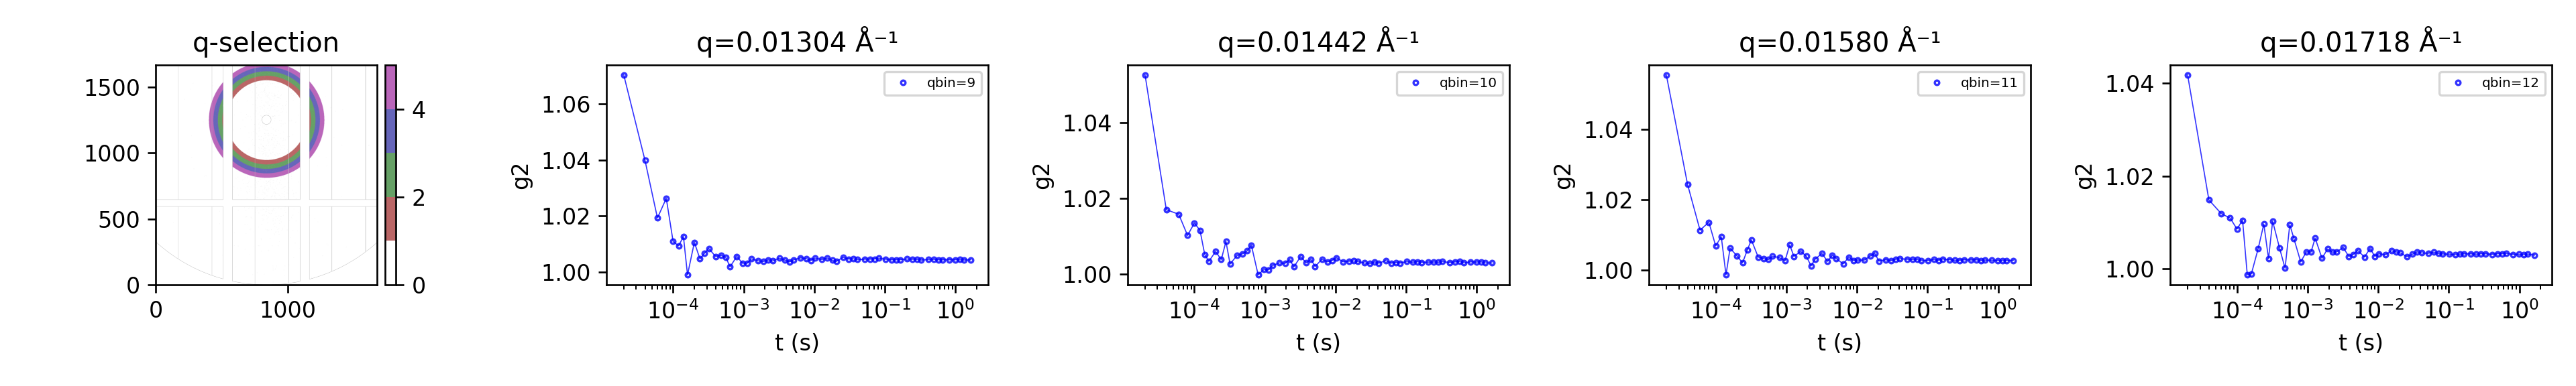

In [15]:
display(Image(entry_files[4]['url'].replace('globus://74defd5b-5f61-42fc-bcc4-834c9f376a4f', str(here))))

In [22]:
import h5py
f = h5py.File('/lus/eagle/projects/XPCS-DATA-DYS/XPCSDATA/Automate/2025-1/milliron202503/rigaku_qmap_Sq360_Dq36_Lin_0501/volfrac315068_26nm-frac_a0118_f100000_r00001/volfrac315068_26nm-frac_a0118_f100000_r00001_results.hdf', 'r')

In [23]:
f

<HDF5 file "volfrac315068_26nm-frac_a0118_f100000_r00001_results.hdf" (mode r)>

In [24]:
f.keys()

<KeysViewHDF5 ['entry', 'xpcs']>

In [32]:
print(f.keys())
print(f['xpcs'].keys())
print(f['xpcs']['multitau'].keys())
norm_g2 = f['xpcs']['multitau']['normalized_g2']

<KeysViewHDF5 ['entry', 'xpcs']>
<KeysViewHDF5 ['multitau', 'qmap', 'spatial_mean', 'temporal_mean']>
<KeysViewHDF5 ['config', 'delay_list', 'normalized_g2', 'normalized_g2_err']>


In [33]:
norm_g2

<HDF5 dataset "normalized_g2": shape (61, 36), type "<f4">